##### [< Forrige](2%20-%20funksjoner.ipynb)     |     [Neste >](3%20-%20funksjoner%20med%20plot.ipynb)

# 3 - matplotlib

Det er fint å kunne lage funksjoner i Python, men det er enda bedre å *se* dem. Vi skal nå se på hvordan vi kan tegne resultatet av funksjoner i et diagram ved hjelp av pakken matplotlib. Vi starter med å *importere* `matplotlib` og `numpy`:

#### Eksempel 1:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Eksempel med bankinnskudd

Vi begynner med å lage funksjonen for et lån fra forrige forelesning. Vi husker at om banken din legger til renten `n` ganger i året, og renten er `r`, så er bankinnskuddet på `x` om `T` år gitt som  $x\cdot (1+\frac{r}{n})^{T\cdot n}$, som vi kan programmere slik:

#### Eksempel 2:

In [2]:
def account_balance(x,r,T,n):
    return x*(1+r/n)**(T*n)

Om renten er 20%=0.2, innskuddet er 100 som forrentes årlig, så kan vi tegne innskuddsfunksjonen for 10 år* som

#### Eksempel 3:

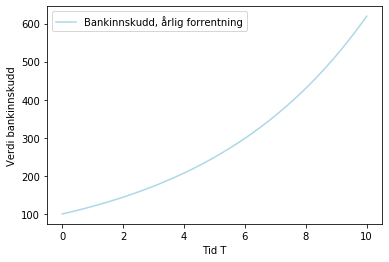

In [3]:
#1. Checking developement over 20 years, with 100 data points
T = np.linspace(0,10,100)

#2. initiating the plot:
fig,ax=plt.subplots()

#3. adding axis lables:
ax.set_ylabel('Verdi bankinnskudd')
ax.set_xlabel('Tid T')

#4. plotting the function:
ax.plot(T, account_balance(100,0.2,T,1),          label='Bankinnskudd, årlig forrentning',    color='lightblue')

#5. adding legend in the upper left corner:
ax.legend(loc='upper left')

Det som skjer over er at vi

1. Definerer for hvilke verdier vi skal tegne og hvor mange punkter. Her ser vi at vi tegner hundre punkter i intervallet 0 til ti
2. Lager to objekter `fig` og `ax` som brukes til å tegne grafene. 
3. Definerer hva som skal være på x og y-aksen
4. Plotter ved å sette inn punktene `T` og funksjonen `account_balance(100,0.2,T,1)` inn i funksjonen `ax.plot`
5. lager ettikett og plasserer den oppe til venstre

Som i forrige forelesning kan det være interessant å sammenligne ulike hyppigheter for å legge til renter. Vi legger derfor til fire grafer til, med henholdsvis kvartalsvis, månedlig, ukentlig og daglig forrentning:

#### Eksempel 4:

In [ ]:
#plotting four graphs with different compounding:
ax.plot(T,       account_balance(100,0.2,T,4),          label='Kvartalsvis forrentning',     color='green')
ax.plot(T,       account_balance(100,0.2,T,12),         label='Måndedlig forrentning',       color='red')
ax.plot(T,       account_balance(100,0.2,T,52),         label='Ukentlig forrentning',        color='orange')
ax.plot(T,       account_balance(100,0.2,T,365),        label='Daglig forrentning',          color='purple')
ax.legend(loc='upper left')
fig

Det er interessant å regne på hva du taper på hyppig forretning. La oss se på differansen mellom daglig og ukentlig, og ukentlig mot årlig:

#### Eksempel 5:

In [53]:
#printing the nummerical difference between annual and daily compounding:
print(f"""Differansen mellom daglig og ukentlig forrentning i løpet av 20 år er {
    np.round(
    account_balance(100,0.2,10,365)-account_balance(100,0.2,10,52)
        ,2)
}
""")
print(f"""Differansen mellom ukentlig og årlig forrentning i løpet av 20 år er {
    np.round(
    account_balance(100,0.2,10,52)-account_balance(100,0.2,10,1)
        ,2)
}
""")

Differansen mellom daglig og ukentlig forrentning i løpet av 20 år er 2.42

Differansen mellom ukentlig og årlig forrentning i løpet av 20 år er 116.9



Vi ser altså at å gå fra ukentlig til daglig forrentning ikke har så mye å si, men forskjellen fra ukentlig til årlig er ganske stor. 

I stedet for å regne ut med daglig forrentning kan vi bruke kontinuerlig, som vil si at vi bruker eksponentialfunksjonen:

#### Eksempel 6:

In [ ]:
#defining the continous compounding function:
def account_balance_exponential(x,r,T):
    return x*np.exp(r*T)

La oss plotte kontinuerlig og daglig forrentning. Legg merke til første linje, som sørger for at vi starter med "blanke ark". 

#### Eksempel 7:

In [ ]:
#Starting with a blank graph by defining ax and fig again:
fig,ax=plt.subplots()

#adding continious compounding to the prevoius plot
ax.plot(T,       account_balance_exponential(100,0.2,T),label='Kontinuerlig forrentet',      color='pink')
ax.plot(T,       account_balance(100,0.2,T,365),        label='Daglig forrentning',          color='purple')

#printing the nummerical difference between continious and daily compounding:
print(f"""Differansen mellom årlig og kontinuerlig forrentning etter 20 år er {
    np.round(
   account_balance_exponential(100,0.2,10)- account_balance(100,0.2,10,365)
        ,2)
}""")


Vi ser at selv om det lønner seg å forrente ofte, er det liten forskjell mellom daglig og kontinuerlig forretning. Likevel benytter vi ofte kontinuerlig forrentning i økonomifaget. Årsaken til det er at eksponenten og logaritmen er mye enklere å jobbe med matematisk enn prosentvis avkastning. Nummerisk er imidlertid forskjellen liten så lenge hyppigheten er høy.  

# Googling

Det er umulig å huske hvordan alle funksjonene til alle pakkene i Python skal brukes, ikke minst fordi det er en konstant uvikling av slike pakker. Heldigvis lages de fleste pakker på en *pytonsk* måte, hvilket vil si at funksjoner og objekter fra forskjellige pakker og forfattere skal oppføre seg forutsigbart og ensartet. Helt selvforklarende er imidlertid ingen pakker. 

Den beste måten å finne ut hvordan du skal bruke en pakke, er derfor å google det du lurer på. Dette må gjøres på engelsk, siden stort sett alt av forum og dokumentasjon er på engelsk. 

La oss derfor ta matplotlib som eksempel. La oss si at du har glemt denne forelesningen og derfor skal finne ut hvordan du plotter en linje med matplotlib. Forsøk å google `"matplotlib plot function"`. I skrivende stund i første treff på Google (det er ikke alltid det første treffet er best), finner du denne koden:


#### Eksempel 8:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^2 here
y = x**2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

Vi ser umiddelbart at det er endel ting vi ikke trenger for et enkelt plott, så vi sletter alt under kommentaren `# setting the axes at the centre` (frem til `# plot the function`). Vi trenger heller ikke definisjonen av funksjonen under kommentaren `# the function, which is y = x^2 here`, siden vi har definert våre egne funksjoner over, så vi sletter den også.  Så bytter vi ut alle `x`'er med `T` og setter for eksempel inn funksjonen for daglig forretning `account_balance(100,0.2,T,365)` inn i `plot`-funksjonen. Da får vi følgende kode:

#### Eksempel 9:

In [ ]:
#From https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
T = np.linspace(-5,5,100)

# plot the function
plt.plot(T,account_balance(100,0.2,T,365), 'r')

# show the plot
plt.show()

Vi ser altså her at ved å bruke eksempler som vi kan endre på, så kan vi raskt finne ut hvordan en pakke fungerer. Bruker du andres kode, bør det generelt kommenteres i koden. 

## Eksempel med tilbud og etterspørsel

Vi definerer først tilbud og etterspørsel slik vi gjorde i forrige forelesning, men med litt andre tall:

#### Eksempel 10:

In [34]:
def supply(x):
    return 0.5*x**2
    
def demand(x):
    return 100/(4+x)

Vi skal nå finne likhet mellom tilbud og etterspørsel grafisk ved å tegne opp begge funksjonene i samme diagram:

#### Eksempel 11:

In [ ]:
#drawing 100 points in the interval 0.0 to 5.0
x = np.linspace(0,10,100)

#drawing supply
plt.plot(x,supply(x),label='Tilbud')

#drawing demand
plt.plot(x,demand(x),color='green',label='Etterspørsel')

#adding legend:
plt.legend(loc='lower right')

#setting the range of y values (the price) to be between 0 and 30, so that we can more
#easily see the equilibrium price
plt.ylim((0,30))

## Oppgaver

#### Oppgave 1:
a) Forsøk å finne prisen og mengden i likevekt (der tilbud=etterspørsel) ved å bruke informasjonen i figuren
b) Gjør endringer i tilbud og etterspørselsfunksjonene og finn likevekt for disse. 

##### [< Forrige](2%20-%20funksjoner.ipynb)     |     [Neste >](3%20-%20funksjoner%20med%20plot.ipynb)